# Imports

In [35]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats      import kurtosis, norm
from sklearn.datasets import load_diabetes

## Loading Datasets

In [36]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)

X_append = pd.DataFrame({col:[np.nan, np.nan, np.nan] for col in X.columns})
y_append = pd.DataFrame({'target':[np.nan, np.nan, np.nan]})

X = pd.concat([X, X_append], axis=0)
y = pd.concat([y, y_append], axis=0)

df = pd.concat([X, y], axis=1)

In [37]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [38]:
df.loc[df['sex'].isna(), 'sex'] = 2

In [39]:
df.isna().mean()

age       0.006742
sex       0.000000
bmi       0.006742
bp        0.006742
s1        0.006742
s2        0.006742
s3        0.006742
s4        0.006742
s5        0.006742
s6        0.006742
target    0.006742
dtype: float64

In [40]:
df.groupby(['sex'])['age'].agg(
    age_max=('max'), 
    age_min=('min'), 
    age_mean=('mean')
)

,age_max,age_min,age_mean
sex,,,
1.0,75.0,19.0,46.382979
2.0,79.0,20.0,50.942029


In [41]:
df_aux = df.groupby(['sex']).agg(
    {
        'age': [
            'sum', 
            'mean', 
            'median', 
            'min', 
            'max', 
            'std', 
            'var',
            'skew',
            ('kurtosis', pd.Series.kurtosis),
            ('range', lambda i: np.max(i) - np.min(i)),
            (f'quantile_0.25', lambda i: pd.Series.quantile(i, q=0.25)),
            (f'quantile_0.5', lambda i: pd.Series.quantile(i, q=0.5)),
            (f'quantile_0.75', lambda i: pd.Series.quantile(i, q=0.75)),
            (f'nanquantile_0.25', lambda i: np.nanquantile(i, q=0.25)),
            (f'nanquantile_0.5', lambda i: np.nanquantile(i, q=0.5)),
            (f'nanquantile_0.75', lambda i: np.nanquantile(i, q=0.75))
        ]
    }
)

In [42]:
df_aux

age                                                                 \
         sum       mean median   min   max        std         var      skew   
sex                                                                           
1.0  10900.0  46.382979   48.0  19.0  75.0  13.120665  172.151846 -0.092271   
2.0  10545.0  50.942029   53.0  20.0  79.0  12.697623  161.229633 -0.394162   

                                                                               \
     kurtosis range quantile_0.25 quantile_0.5 quantile_0.75 nanquantile_0.25   
sex                                                                             
1.0 -0.619879  56.0          37.0         48.0          55.0             37.0   
2.0 -0.596718  59.0          41.0         53.0          60.0             41.0   

                                      
    nanquantile_0.5 nanquantile_0.75  
sex                                   
1.0            48.0             55.0  
2.0            53.0             60.0

In [43]:
df_aux.columns = ['age__' + name for name in df_aux.columns.droplevel()]

In [44]:
df_aux.reset_index()

,sex,age__sum,age__mean,age__median,age__min,age__max,age__std,age__var,age__skew,age__kurtosis,age__range,age__quantile_0.25,age__quantile_0.5,age__quantile_0.75,age__nanquantile_0.25,age__nanquantile_0.5,age__nanquantile_0.75
0,1.0,10900.0,46.382979,48.0,19.0,75.0,13.120665,172.151846,-0.092271,-0.619879,56.0,37.0,48.0,55.0,37.0,48.0,55.0
1,2.0,10545.0,50.942029,53.0,20.0,79.0,12.697623,161.229633,-0.394162,-0.596718,59.0,41.0,53.0,60.0,41.0,53.0,60.0


In [45]:
list_primitives_func = [
    'sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'skew', ('kurtosis', pd.Series.kurtosis), ('range', lambda i: np.max(i) - np.min(i))]

In [46]:
list_quantiles = [.05, 0.25, 0.50, 0.75, 0.95]
list_quantiles_func = [(f'quantile_{q}', lambda i, q=q: pd.Series.quantile(i, q=q)) for q in list_quantiles]

list_quantiles_func

[('quantile_0.05', <function __main__.<listcomp>.<lambda>(i, q=0.05)>),
 ('quantile_0.25', <function __main__.<listcomp>.<lambda>(i, q=0.25)>),
 ('quantile_0.5', <function __main__.<listcomp>.<lambda>(i, q=0.5)>),
 ('quantile_0.75', <function __main__.<listcomp>.<lambda>(i, q=0.75)>),
 ('quantile_0.95', <function __main__.<listcomp>.<lambda>(i, q=0.95)>)]

In [47]:
list_primitives_func.extend(list_quantiles_func)

In [48]:
list_primitives_func

['sum',
 'mean',
 'median',
 'min',
 'max',
 'std',
 'var',
 'skew',
 ('kurtosis',
  <function pandas.core.series.Series.kurt(self, axis: 'Axis | None' = 0, skipna: 'bool' = True, numeric_only: 'bool' = False, **kwargs)>),
 ('range', <function __main__.<lambda>(i)>),
 ('quantile_0.05', <function __main__.<listcomp>.<lambda>(i, q=0.05)>),
 ('quantile_0.25', <function __main__.<listcomp>.<lambda>(i, q=0.25)>),
 ('quantile_0.5', <function __main__.<listcomp>.<lambda>(i, q=0.5)>),
 ('quantile_0.75', <function __main__.<listcomp>.<lambda>(i, q=0.75)>),
 ('quantile_0.95', <function __main__.<listcomp>.<lambda>(i, q=0.95)>)]

In [49]:
df_aux = df.groupby(['sex']).agg(
    {
        'age': list_primitives_func
    }
)

In [50]:
df_aux

age                                                                 \
         sum       mean median   min   max        std         var      skew   
sex                                                                           
1.0  10900.0  46.382979   48.0  19.0  75.0  13.120665  172.151846 -0.092271   
2.0  10545.0  50.942029   53.0  20.0  79.0  12.697623  161.229633 -0.394162   

                                                                            \
     kurtosis range quantile_0.05 quantile_0.25 quantile_0.5 quantile_0.75   
sex                                                                          
1.0 -0.619879  56.0          23.0          37.0         48.0          55.0   
2.0 -0.596718  59.0          28.0          41.0         53.0          60.0   

                   
    quantile_0.95  
sex                
1.0          68.0  
2.0          68.0

In [51]:
def agg_num(df, groupby, variables, quantiles=[0.05, 0.25, 0.75, 0.95]):

    list_funcs = [
        'sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'skew',
        ('kurtosis', pd.Series.kurtosis), ('range', lambda i: np.max(i) - np.min(i))]
    
    list_quantiles = [
        (f'quantile_{q}', lambda i, q=q: pd.Series.quantile(i, q=q)) for q in quantiles]
    
    list_funcs.extend(list_quantiles)

    dict_funcs = {var: list_funcs for var in variables}

    df_agg = df.groupby(groupby).agg(dict_funcs)

    df_agg.columns = [f'{col[0]}_{col[1]}' for col in df_agg.columns]

    return df_agg.reset_index()

In [52]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [53]:
df_aux = agg_num(X, groupby=['sex'], variables=['age', 'bmi'])

In [54]:
df_aux.T

,0,1
sex,1.000000,2.000000
age_sum,10900.000000,10545.000000
age_mean,46.382979,50.942029
age_median,48.000000,53.000000
age_min,19.000000,20.000000
age_max,75.000000,79.000000
age_std,13.120665,12.697623
age_var,172.151846,161.229633
age_skew,-0.092271,-0.394162
age_kurtosis,-0.619879,-0.596718


In [55]:
kurtosis([1, 2, 3, 4, 5, 6, 2, 3, np.nan, 5, 1, 2], nan_policy='omit')

-1.1396107748902335

In [56]:
pd.Series.kurtosis(pd.Series([1, 2, 3, 4, 5, 6, 2, 3, np.nan, 5, 1, 2]))

-1.0660179581503892

In [57]:
pd.Series.quantile(pd.Series([1, 2, 3, 4, 5, 6, 2, 3, np.nan, 5, 1, 2]), q=0.05)

1.0

In [58]:
np.nanquantile([1, 2, 3, 4, 5, 6, 2, 3, np.nan, 5, 1, 2], q=0.05)

1.0

In [59]:
np.quantile([1, 2, 3, 4, 5, 6, 2, 3, np.nan, 5, 1, 2], q=0.05)

nan

In [60]:
data = norm.rvs(size=1000, random_state=3)

In [61]:
kurtosis(data)

-0.06928694200380558

In [62]:
pd.Series.kurtosis(pd.Series(data))

-0.06361054377246234

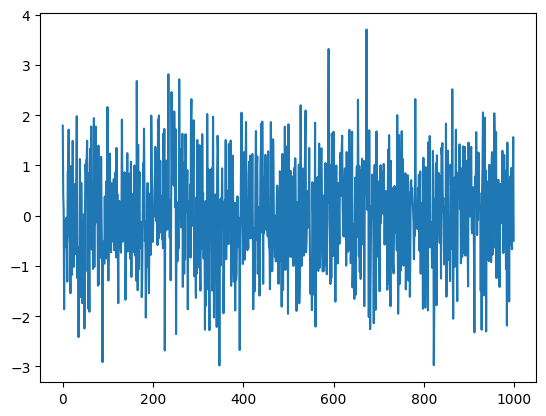

In [63]:
plt.plot(data)